# Preamble, inc pip install scipy 1.1.0 and download of data from github

In [ ]:
"""
Recognising printed pages for multiple languages
The first part is to extract letters and words from an image of a printed page. 

So the system will take an image of a printed text, and output a text of the words in that image.

The first two steps for this task is to build a dataset that is suited for training,
and then train a letter recogniser based on such dataset. 
(SVM, K-NN, neural network, and CNN etc) or a combination of them.

Prepare data from at least two kinds of languages, such as English and Chinese. 
"""

In [1]:
#extract letters
!pip install scipy==1.1.0
# You need to restart the Runtime after installing the scipy

     |████████████████████████████████| 31.2MB 140kB/s 
ERROR: umap-learn 0.4.4 has requirement scipy>=1.3.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


Get the training, testing and apropreate folders:

In [2]:
import requests
import zipfile
import io
r = requests.get('https://github.com/Giles-Billenness/COM2028/raw/master/COM2028Writing.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

# Character extraction class

Defines Character extraction classs and method:

In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.misc import imread, imresize, imsave
from skimage.morphology import label
from skimage.measure import regionprops
from skimage.transform import resize

class Extract_Letters:
    def extractFile(self, filename, mode):    
        image = imread(filename, 1)

        # apply threshold in order to make the image binary
        bw = (image < 120).astype(np.float)

        # remove artifacts connected to image border
        cleared = bw.copy()
        # clear_border(cleared)

        # label image regions
        label_image = label(cleared, neighbors=8)
        borders = np.logical_xor(bw, cleared)
        label_image[borders] = -1

        letters = list()
        order = list()
        total = 0
        for region in regionprops(label_image):
            minr, minc, maxr, maxc = region.bbox#(255, 690, 0, 308, 720, 3), normal (255, 690, 308, 720)
            
            # skip small images
            if maxr - minr > len(image) / 250:  # better to use height rather than area.
                #minr-=(maxr - minr)*0.40 #add extra area to the top, SET IN MODE if needed.
                rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                          fill=False, edgecolor='red', linewidth=2)
                total+=1
                order.append((int(minr), minc, maxr, maxc))#region.bbox)

        # sort the detected characters left->right, top->bottom
        lines = list()
        first_in_line = ''
        counter = 0

        # worst case scenario there can be 1 character per line
        for x in range(len(order)):
            lines.append([])

        for character in order:
            if first_in_line == '':
                first_in_line = character
                lines[counter].append(character)
            elif abs(character[0] - first_in_line[0]) < (first_in_line[2] - first_in_line[0]):
                lines[counter].append(character)
            elif abs(character[0] - first_in_line[0]) > (first_in_line[2] - first_in_line[0]):
                first_in_line = character
                counter += 1
                lines[counter].append(character)

        for x in range(len(lines)):
            lines[x].sort(key=lambda tup: tup[1])

        final = list()
        prev_tr = 0
        prev_line_br = 0

        for i in range(len(lines)):
            for j in range(len(lines[i])):
                tl_2 = lines[i][j][1]
                bl_2 = lines[i][j][0]
                if tl_2 > prev_tr and bl_2 > prev_line_br:
                    tl, tr, bl, br = lines[i][j]
                    letter_raw = bw[tl:bl, tr:br]
                    letter_norm = resize(letter_raw, (20, 20))
                    final.append(letter_norm)
                    prev_tr = lines[i][j][3]
                if j == (len(lines[i]) - 1):
                    prev_line_br = lines[i][j][2]
            prev_tr = 0
            tl_2 = 0
            #print ('Characters recognized: ' + str(len(final)))

        print(filename)
        if(mode == "english"): 
          print("Does THIS FILE HAVE CORRECT NUM OF CHARACTERS")
          print("for a english training or testing document?")
          print(total % 61 == 0)
        if(mode == "greek"):
          print("Does THIS FILE HAVE CORRECT NUM OF CHARACTERS")
          print("for a greek training or testing document?")
          print(total % 24 == 0)

        return final
    
    def __init__(self):
        print("Extracting characters...")


# Extracting training data from training pages:

Extracts the training data from the pages using the class and method:

In [4]:
#%xmode Verbose
#extracts the training data from the pages into apprropreate folders for each character
start_time = time.time()
extract = Extract_Letters()

training_files = []
#Extended training sets
new_training_files = ['/content/WritingRecognition/NEW_DATA_english/training/train1-1.png','/content/WritingRecognition/NEW_DATA_english/training/train2-1.png', '/content/WritingRecognition/NEW_DATA_english/training/train3-1.png','/content/WritingRecognition/NEW_DATA_english/training/train4-1.png' ,'/content/WritingRecognition/NEW_DATA_english/training/train5-1.png', '/content/WritingRecognition/NEW_DATA_english/training/train6-1.png']

#training_files.append('/content/drive/My Drive/Colab Notebooks/WritingRecognition/ocr/training/training2.png')#these 2 arent correctly detected by bounding boxes.
#training_files.append('/content/drive/My Drive/Colab Notebooks/WritingRecognition/ocr/training/training4.png')# so they are not included

training_files.append('/content/WritingRecognition/old_data_english/training/training1.png') 
training_files.append('/content/WritingRecognition/old_data_english/training/training3.png')
training_files.append('/content/WritingRecognition/old_data_english/training/training5.png')
training_files.append('/content/WritingRecognition/old_data_english/training/training6.png')

training_files.extend(new_training_files)

print(training_files)
   
folder_string = 'abcdefghijklmnopqrstuvwxyzabcdefghijklmnopqrstuvwxyz123456789'#folder to put the extracted letter in, dependant on the order.
name_counter = 1
for files in training_files:#for each file in training data folder
    letters = extract.extractFile(files,"english")#for each file run letter extraction

    string_counter = 0
    for i in letters:#for each letter in the file
        if string_counter > 60:#loop back at the end
            string_counter = 0
        #saves image to training type folder as a snippit
        #print('/content/drive/My Drive/Colab Notebooks/WritingRecognition/training_type/' + str(folder_string[string_counter]) + '/' + str(name_counter) + '_snippet.png')
        #print(i)
        imsave('/content/WritingRecognition/training_snippets_english/' + str(folder_string[string_counter]) + '/' + str(name_counter) + '_snippet.png', i)

        string_counter += 1
        name_counter += 1

print (time.time() - start_time, "seconds" )

Extracting characters...
['/content/WritingRecognition/old_data_english/training/training1.png', '/content/WritingRecognition/old_data_english/training/training3.png', '/content/WritingRecognition/old_data_english/training/training5.png', '/content/WritingRecognition/old_data_english/training/training6.png', '/content/WritingRecognition/NEW_DATA_english/training/train1-1.png', '/content/WritingRecognition/NEW_DATA_english/training/train2-1.png', '/content/WritingRecognition/NEW_DATA_english/training/train3-1.png', '/content/WritingRecognition/NEW_DATA_english/training/train4-1.png', '/content/WritingRecognition/NEW_DATA_english/training/train5-1.png', '/content/WritingRecognition/NEW_DATA_english/training/train6-1.png']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2


/content/WritingRecognition/old_data_english/training/training1.png
Does THIS FILE HAVE CORRECT NUM OF CHARACTERS
for a english training or testing document?
True


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


/content/WritingRecognition/old_data_english/training/training3.png
Does THIS FILE HAVE CORRECT NUM OF CHARACTERS
for a english training or testing document?
True
/content/WritingRecognition/old_data_english/training/training5.png
Does THIS FILE HAVE CORRECT NUM OF CHARACTERS
for a english training or testing document?
True
/content/WritingRecognition/old_data_english/training/training6.png
Does THIS FILE HAVE CORRECT NUM OF CHARACTERS
for a english training or testing document?
True
/content/WritingRecognition/NEW_DATA_english/training/train1-1.png
Does THIS FILE HAVE CORRECT NUM OF CHARACTERS
for a english training or testing document?
True
/content/WritingRecognition/NEW_DATA_english/training/train2-1.png
Does THIS FILE HAVE CORRECT NUM OF CHARACTERS
for a english training or testing document?
True
/content/WritingRecognition/NEW_DATA_english/training/train3-1.png
Does THIS FILE HAVE CORRECT NUM OF CHARACTERS
for a english training or testing document?
True
/content/WritingRecogniti

# Create training dataset

SVM collection of data + labels & creation of a model:

Takes the training snippets and takes the hog features of each creating a data array and a labels array

In [5]:
import imageio
from skimage.feature import peak_local_max, hog
from sklearn import svm, datasets

In [60]:
#paths for the training samples ------------ have 1 per character
import os
base_dir = "/content/WritingRecognition/training_snippets_english/"#parent dir
dir_names = next(os.walk(base_dir))[1]#list of sub dir
print (dir_names)

#returns a list of the file names in the directory
def file_names(path):
  return sorted([filename for filename in os.listdir(path) if  filename.endswith('.png') ])
#-----------------------------------------------------------------------
#fill the training dataset
#filenames array, label you want the character to have
def file_name_hog_features(filenames, label):#creates dataset with hogfeatures of the images + labels 
  for filename in filenames:
    image = imread(filename)
    hog_features = hog(image, orientations=12, pixels_per_cell=(2, 2), cells_per_block=(1, 1))#hog features
    data.append(hog_features)
    labels.append(label)
  print('Finished adding %s samples to dataset'%(label))

data = []
labels = []

#for each directory add the hog features of the imgs and label them appropreatly
for dir_name in dir_names:
  #print(base_dir + dir_name)
  FILENAMES = file_names(base_dir + dir_name)#get file name list for the directory
  #add the full path to all the filenames
  FILENAMES = [base_dir + dir_name + "/" + filename for filename in FILENAMES]
  #print(FILENAMES)
  file_name_hog_features(FILENAMES, dir_name)


['h', '9', '1', '2', 'v', 'q', 'k', '4', '6', 'r', 'j', 's', 'g', 'f', 'a', 'l', 'y', 'z', '7', 'n', 'b', 'w', '8', 'x', 'i', 'd', '3', 'p', 'e', 'u', 'o', 't', 'm', '5', 'c']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app


Finished adding h samples to dataset
Finished adding 9 samples to dataset
Finished adding 1 samples to dataset
Finished adding 2 samples to dataset
Finished adding v samples to dataset
Finished adding q samples to dataset
Finished adding k samples to dataset
Finished adding 4 samples to dataset
Finished adding 6 samples to dataset
Finished adding r samples to dataset
Finished adding j samples to dataset
Finished adding s samples to dataset
Finished adding g samples to dataset
Finished adding f samples to dataset
Finished adding a samples to dataset
Finished adding l samples to dataset
Finished adding y samples to dataset
Finished adding z samples to dataset
Finished adding 7 samples to dataset
Finished adding n samples to dataset
Finished adding b samples to dataset
Finished adding w samples to dataset
Finished adding 8 samples to dataset
Finished adding x samples to dataset
Finished adding i samples to dataset
Finished adding d samples to dataset
Finished adding 3 samples to dataset
F

# Create testing data 

create snippets and take the hog features of them, creating a testing data array and testing data labels array

In [7]:
# Extract training data from training images.
import time
start_time = time.time()
extract = Extract_Letters()

training_files = []

training_files.append("/content/WritingRecognition/NEW_DATA_english/testing/test1-1.png")#my created testing data pages
training_files.append("/content/WritingRecognition/NEW_DATA_english/testing/test2-1.png")
training_files.append("/content/WritingRecognition/NEW_DATA_english/testing/test3-1.png")

folder_string = 'abcdefghijklmnopqrstuvwxyzabcdefghijklmnopqrstuvwxyz123456789'
name_counter = 1
for files in training_files:#for each file in training data folder
    letters = extract.extractFile(files, "english")#for each file run letter extraction

    string_counter = 0
    for i in letters:#for each letter in the file
        if string_counter > 60:
            string_counter = 0
        #saves image to training type folder as a snippit

        imsave('/content/WritingRecognition/test_snippets_english/' + str(folder_string[string_counter]) + '/' + str(name_counter) + '_snippet.png', i)

        string_counter += 1
        name_counter += 1

print (time.time() - start_time, "seconds" )#test characters extracted

Extracting characters...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2


/content/WritingRecognition/NEW_DATA_english/testing/test1-1.png
Does THIS FILE HAVE CORRECT NUM OF CHARACTERS
for a english training or testing document?
True


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


/content/WritingRecognition/NEW_DATA_english/testing/test2-1.png
Does THIS FILE HAVE CORRECT NUM OF CHARACTERS
for a english training or testing document?
True
/content/WritingRecognition/NEW_DATA_english/testing/test3-1.png
Does THIS FILE HAVE CORRECT NUM OF CHARACTERS
for a english training or testing document?
True
2.6696040630340576 seconds


In [61]:
#now create dataset with them.
from skimage.feature import peak_local_max, hog
# SVM
#paths for the training samples ------------ have 1 per character
base_dir = "/content/WritingRecognition/test_snippets_english/"
dir_names = next(os.walk(base_dir))[1]
print (dir_names)

#returns a list of the file names in the directory
def file_names(path):
  return sorted([filename for filename in os.listdir(path) if  filename.endswith('.png') ])
#-----------------------------------------------------------------------
#fill the training dataset
#filenames array, label you want the character to have
def file_name_hog_features(filenames, label):
  for filename in filenames:
    image = imread(filename)
    #image = resize(image, (20,20)) #pix per cell :(
    hog_features = hog(image, orientations=12, pixels_per_cell=(2, 2), cells_per_block=(1, 1))
    test_data.append(hog_features)
    test_labels.append(label)
  print('Finished adding %s samples to dataset'%(label))

test_data = []
test_labels = []

#for each directory add the hog features of the imgs and label them appropreatly
for dir_name in dir_names:
  #print(base_dir + dir_name)
  FILENAMES = file_names(base_dir + dir_name)#get file name list for the directory
  #add the full path to all the filenames
  FILENAMES = [base_dir + dir_name + "/" + filename for filename in FILENAMES]
  #print(FILENAMES)
  file_name_hog_features(FILENAMES, dir_name)

['h', '9', '1', '2', 'v', 'q', 'k', '4', '6', 'r', 'j', 's', 'g', 'f', 'a', 'l', 'y', 'z', '7', 'n', 'b', 'w', '8', 'x', 'i', 'd', '3', 'p', 'e', 'u', 'o', 't', 'm', '5', 'c']
Finished adding h samples to dataset


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


Finished adding 9 samples to dataset
Finished adding 1 samples to dataset
Finished adding 2 samples to dataset
Finished adding v samples to dataset
Finished adding q samples to dataset
Finished adding k samples to dataset
Finished adding 4 samples to dataset
Finished adding 6 samples to dataset
Finished adding r samples to dataset
Finished adding j samples to dataset
Finished adding s samples to dataset
Finished adding g samples to dataset
Finished adding f samples to dataset
Finished adding a samples to dataset
Finished adding l samples to dataset
Finished adding y samples to dataset
Finished adding z samples to dataset
Finished adding 7 samples to dataset
Finished adding n samples to dataset
Finished adding b samples to dataset
Finished adding w samples to dataset
Finished adding 8 samples to dataset
Finished adding x samples to dataset
Finished adding i samples to dataset
Finished adding d samples to dataset
Finished adding 3 samples to dataset
Finished adding p samples to dataset
F

# Training the methods(SVM + KNN)

In [62]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
print('Training the SVM')
svm_clf = LinearSVC(dual=False,verbose=1)#create the SVC (linear)
svm_clf.fit(data, labels)#train the svm with the data provided.

scores = cross_val_score(svm_clf, data, labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))#cross validation score

Training the SVM
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Accuracy: 0.95 (+/- 0.05)


In [63]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
print('Training the KNN')
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=2)
knn_clf.fit(data, labels)

scores = cross_val_score(knn_clf, data, labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))#cross validation score

Training the KNN
Accuracy: 0.89 (+/- 0.07)


# Testing & accuracy

In [64]:
from sklearn import metrics

test_predict_svm =[]#predicted labels for the test data
test_predict_knn =[]

#test each prediction method to gen predicted labels for the test data
for ele in test_data:
  result_type_svm = svm_clf.predict(ele.reshape(1,-1))
  test_predict_svm.append(result_type_svm)#add svm predictions

  result_type_KNN = knn_clf.predict(ele.reshape(1,-1))
  test_predict_knn.append(result_type_KNN)#add knn predictions

In [65]:
print("SVM accuracy Score with test data: ")
scores = metrics.accuracy_score(test_labels, test_predict_svm, normalize=True)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

SVM accuracy Score with test data: 
Accuracy: 0.97 (+/- 0.00)


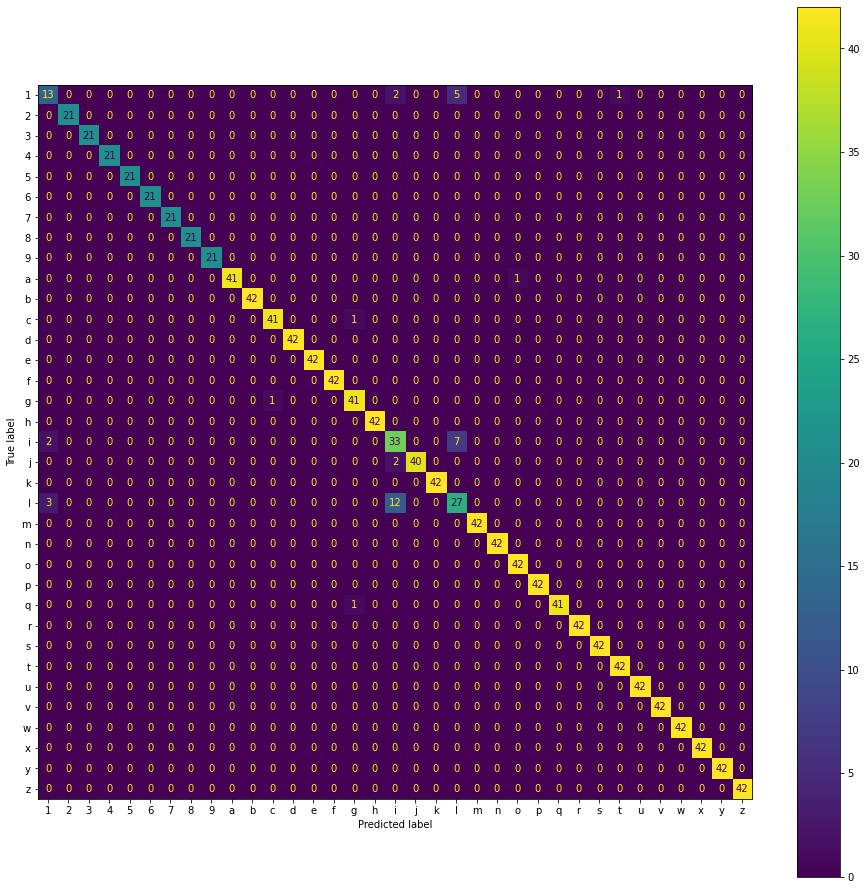

In [66]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 16))
plot_confusion_matrix(svm_clf, test_data, test_labels, ax=ax)

In [67]:
print("KNN accuracy Score with test data: ")
scores = metrics.accuracy_score(test_labels, test_predict_knn, normalize=True)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

KNN accuracy Score with test data: 
Accuracy: 0.95 (+/- 0.00)


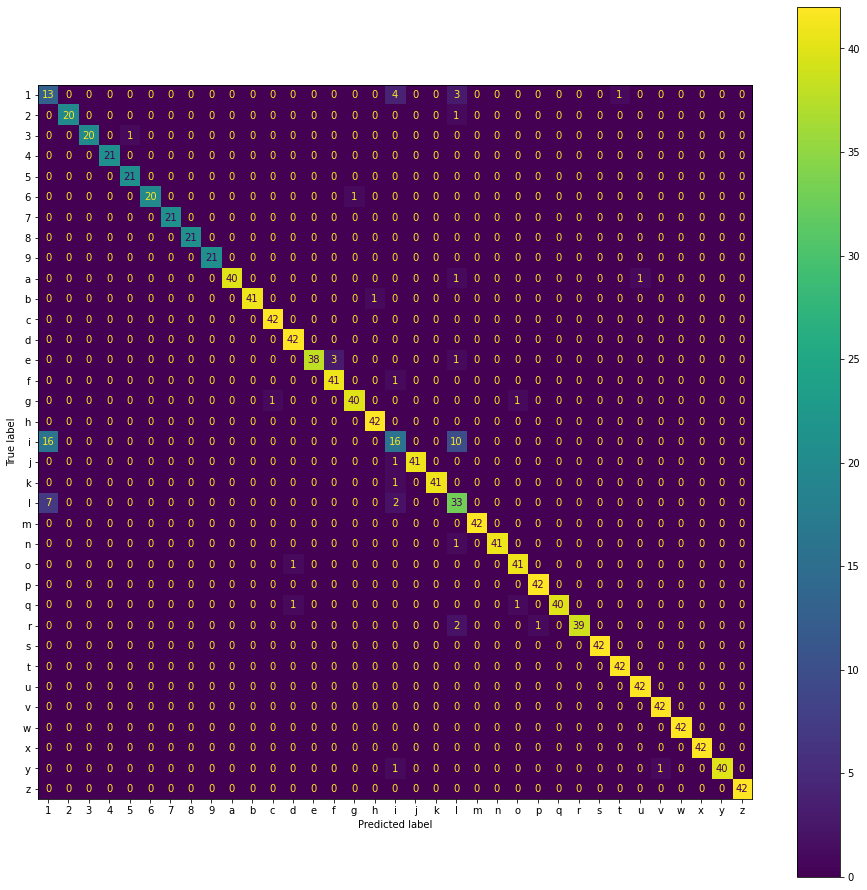

In [68]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 16))
plot_confusion_matrix(knn_clf, test_data, test_labels, ax=ax)

# Test letter recognition on a page

Extract document testing data from pages in same way & have SVM model predict each letter extracted:

In [81]:
#have each letter classifed and its classification added to a list then printed out, then have this list split appart for each word (in the case of perfect classfication).
# Extract letters from page
start_time = time.time()
extract = Extract_Letters()

letters_in_doc_svm = []
letters_in_doc_knn = []

letters = extract.extractFile("/content/WritingRecognition/old_data_english/testing/shazam.png", "defualt")#test document

for i in letters:#for each letter in the file    
  hog_features = hog(i, orientations=12, pixels_per_cell=(2, 2), cells_per_block=(1, 1))
  result_type_svm = svm_clf.predict(hog_features.reshape(1,-1))
  result_type_knn = knn_clf.predict(hog_features.reshape(1,-1))
  letters_in_doc_svm.append(result_type_svm)
  letters_in_doc_knn.append(result_type_knn)
  
doc_svm = ""
doc_knn = ""
print (time.time() - start_time, "seconds" )
for ele in letters_in_doc_svm:#num should be the same
  doc_svm+=(ele[0])#gets just the predicted character and adds it to the string
for ele in letters_in_doc_knn:
  doc_knn+=(ele[0])

print("svm page interpretation: ")
print(doc_svm)
print("knn page interpretation: ")
print(doc_knn)

Extracting characters...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2


/content/WritingRecognition/old_data_english/testing/shazam.png
141.75899267196655 seconds
svm page interpretation: 
nvididsgrdphicschipsarentusedjustforgamesdnymoresincethecompdnymadeitschipsproyrammabietheyaretakingonfunctionsthdtinteimicroprocessorsdoandmorethdnevertheydrebeinyusedforbiyddtanumbercrunchinydndsoivingprobiemsthatpreviousiyhadtobedonebynongraphicssupercomputersjenhsunhudngkpicturedjchiefexecutiveofnvidiasdidinakeynotespeechatthecompanysgputechconferencethattopenterpriseandmobiieappcompaniesdreusinygpuskyrdphicsprocessingunitsjtohdndiebiydatadnaiyticsadvdncesedrchdndtasksiikefdcerecognitiontheseappiicationsarespreaddcrossthecommerciaidndconsumerspacescustomerswhoareusinynvidiagpusinserversmadebycomputermdkersinciudeshdzdmsdiesforcecomandcortexicatheydreusingnvidiatesidgpusforcomputingtdsksbeyondtrdditiondiyraphicsprocessinytheprobiemsathandinciudedudiosearchsuchdsshdzamsservicethatteiisyouwhdtsongyoureiisteninytoontherddiogpusendbieustohandieourtremendousprocessingneeds

In [83]:
#extreamly rough estimation (relient on correct order and character, easily bad if a character isnt extracted or an extra is) - to use this it is fairly required to check that the correct number of bounding boxes are being detected on the test document before testing.
real_string = list("nvidiasgraphicschipsarentusedjustforgamesanymoresincethecompanymadeitschipsprogrammabletheyaretakingonfunctionsthatintelmicroprocessorsdoandmorethanevertheyarebeingusedforbigdatanumbercrunchingandsolvingproblemsthatpreviouslyhadtobedonebynongraphicssupercomputersjenhsunhuangpicturedchiefexecutiveofnvidiasaidinakeynotespeechatthecompanysgputechconferencethattopenterpriseandmobileappcompaniesareusinggpusgraphicsprocessingunitstohandlebigdataanalyticsadvancesearchandtaskslikefacerecognitiontheseapplicationsarespreadacrossthecommercialandconsumerspacescustomerswhoareusingnvidiagpusinserversmadebycomputermakersincludeshazamsalesforcecomandcortexicatheyareusingnvidiateslagpusforcomputingtasksbeyondtraditionalgraphicsprocessingtheproblemsathandincludeaudiosearchsuchasshazamsservicethattellsyouwhatsongyourelisteningtoontheradiogpusenableustohandleourtremendousprocessingneedsatasubstantialcostsavingsdeliveringtwicetheperformanceperdollarcomparedtoacpubasedsystemsaidjasontituschieftechnologyofficerofshazamentertainmentweareaddingmillionsofvideoandforeignlanguageaudiotrackstoourexistingservicesandgpuacceleratorsgiveusawaytoachievescalablegrowthshazamcanidentifytheacousticfingerprintofsongsfroma27milliontrackdatabaseandthenserveanswersto300millionuserspeoplearedoing10millionsongsearchesaday")
doc_svm= list(doc_svm)
doc_knn= list(doc_knn)

diff_len_svm = (len(real_string) - len(doc_svm))#diff in len

diff_len_KNN = (len(real_string) - len(doc_knn))

if(diff_len_svm>0):#if too few
  for i in range (-diff_len_svm):
    doc_svm+="0"#fill with zeros that are not part of this classfication model
if(diff_len_svm<0): #if too many
  doc_svm = doc_svm[:len(doc_svm)+diff_len_svm]#remove any extra

#do the same for knn
if(diff_len_KNN>0):
  for i in range (-diff_len_KNN):
    doc_knn+="0"
if(diff_len_KNN<0): 
  doc_knn = doc_knn[:len(doc_knn)+diff_len_KNN]
  #remove any extra

scores = metrics.accuracy_score(real_string, doc_svm, normalize=True)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = metrics.accuracy_score(real_string, doc_knn, normalize=True)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.23 (+/- 0.00)
Accuracy: 0.21 (+/- 0.00)


# Second language (Greek) (lowercase)

Extract the letters to train: run the extract letters class before this

In [117]:
start_time = time.time()
extract = Extract_Letters()

#My created lowercase greek training files
training_files = ['/content/WritingRecognition/Greek_data_train/lowercase/greek letters 1-1.png','/content/WritingRecognition/Greek_data_train/lowercase/greek letters 2-1.png','/content/WritingRecognition/Greek_data_train/lowercase/greek letters 3-1.png']

print(training_files)
   
folder_string = 'αβγδεζηθικλμνξοπρστυφχψω'#new folders
name_counter = 1
for files in training_files:#for each file in training data folder
    letters = extract.extractFile(files, "greek")#for each file run letter extraction
    string_counter = 0
    for i in letters:#for each letter in the file
        if string_counter > 23:#new number of characters
            string_counter = 0
        #saves image to training type folder as a snippit
        #print('/content/drive/My Drive/Colab Notebooks/WritingRecognition/training_type/' + str(folder_string[string_counter]) + '/' + str(name_counter) + '_snippet.png')
        #print(i)
        # #-----------------------------------show the image
        # from PIL import Image
        # import numpy as np
        # from matplotlib import pyplot as plt
        # plt.imshow(i, interpolation='nearest')
        # plt.show()
        # #-----------------------------------
        imsave('/content/WritingRecognition/greek_train_snippets/' + str(folder_string[string_counter]) + '/' + str(name_counter) + '_snippet.png', i)

        string_counter += 1
        name_counter += 1

print (time.time() - start_time, "seconds" )

Extracting characters...
['/content/WritingRecognition/Greek_data_train/lowercase/greek letters 1-1.png', '/content/WritingRecognition/Greek_data_train/lowercase/greek letters 2-1.png', '/content/WritingRecognition/Greek_data_train/lowercase/greek letters 3-1.png']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2


/content/WritingRecognition/Greek_data_train/lowercase/greek letters 1-1.png
Does THIS FILE HAVE CORRECT NUM OF CHARACTERS
for a greek training or testing document?
True


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


/content/WritingRecognition/Greek_data_train/lowercase/greek letters 2-1.png
Does THIS FILE HAVE CORRECT NUM OF CHARACTERS
for a greek training or testing document?
True
/content/WritingRecognition/Greek_data_train/lowercase/greek letters 3-1.png
Does THIS FILE HAVE CORRECT NUM OF CHARACTERS
for a greek training or testing document?
True
1.2160003185272217 seconds


In [118]:
import imageio
from skimage.feature import peak_local_max, hog
from sklearn import svm, datasets

In [119]:
#paths for the training samples ------------ have 1 per character
import os
base_dir = "/content/WritingRecognition/greek_train_snippets/"
dir_names = next(os.walk(base_dir))[1]
print (dir_names)

#returns a list of the file names in the directory
def file_names(path):
  return sorted([filename for filename in os.listdir(path) if  filename.endswith('.png') ])
#-----------------------------------------------------------------------
#fill the training dataset
#filenames array, label you want the character to have
def file_name_hog_features(filenames, label):#creates dataset with hogfeatures of the images + labels 
  for filename in filenames:
    image = imread(filename)
    #image = resize(image, (20,20)) #pix per cell :(
    hog_features = hog(image, orientations=12, pixels_per_cell=(2, 2), cells_per_block=(1, 1))
    data.append(hog_features)
    labels.append(label)
  print('Finished adding %s samples to dataset'%(label))

data = []
labels = []

#for each directory add the hog features of the imgs and label them appropreatly
for dir_name in dir_names:
  #print(base_dir + dir_name)
  FILENAMES = file_names(base_dir + dir_name)#get file name list for the directory
  #add the full path to all the filenames
  FILENAMES = [base_dir + dir_name + "/" + filename for filename in FILENAMES]
  #print(FILENAMES)
  file_name_hog_features(FILENAMES, dir_name)

['δ', 'ζ', 'σ', 'ε', 'λ', 'χ', 'θ', 'κ', 'ξ', 'ν', 'γ', 'ι', 'α', 'τ', 'ω', 'β', 'ο', 'ψ', 'π', 'φ', 'ρ', 'μ', 'υ', 'η']
Finished adding δ samples to dataset
Finished adding ζ samples to dataset
Finished adding σ samples to dataset


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app


Finished adding ε samples to dataset
Finished adding λ samples to dataset
Finished adding χ samples to dataset
Finished adding θ samples to dataset
Finished adding κ samples to dataset
Finished adding ξ samples to dataset
Finished adding ν samples to dataset
Finished adding γ samples to dataset
Finished adding ι samples to dataset
Finished adding α samples to dataset
Finished adding τ samples to dataset
Finished adding ω samples to dataset
Finished adding β samples to dataset
Finished adding ο samples to dataset
Finished adding ψ samples to dataset
Finished adding π samples to dataset
Finished adding φ samples to dataset
Finished adding ρ samples to dataset
Finished adding μ samples to dataset
Finished adding υ samples to dataset
Finished adding η samples to dataset


Then create testing snippets and data with labels

In [120]:
# Extract training data from training images.
import time
start_time = time.time()
extract = Extract_Letters()

training_files = []
#training files from online sources in diffrent resolutions, with my own created data as well
training_files.append("/content/WritingRecognition/Greek_data_test/greeklowercase 1.png")
training_files.append("/content/WritingRecognition/Greek_data_test/greek letters test 1-1.png")

training_files.append("/content/WritingRecognition/Greek_data_test/greek very low res rounded.png")
training_files.append("/content/WritingRecognition/Greek_data_test/rounded low res.png")
training_files.append("/content/WritingRecognition/Greek_data_test/slightly bad (low res).png")

# training_files.append("/content/WritingRecognition/Greek_data_test/Causes data shift by 1 - dont use.png")#causes data shift remove from testing (could be due to the characters being very close and a box is omitted)

folder_string = 'αβγδεζηθικλμνξοπρστυφχψω'#just set to the string of charcters you want recognised
name_counter = 1
for files in training_files:#for each file in training data folder
    letters = extract.extractFile(files, "greek")#for each file run letter extraction

    string_counter = 0
    for i in letters:#for each letter in the file
        if string_counter > 23:#set this to the number of characters you want - 1 (as it starts from 0)
            string_counter = 0
        #saves image to training type folder as a snippit
        imsave('/content/WritingRecognition/greek_test_snippets/' + str(folder_string[string_counter]) + '/' + str(name_counter) + '_snippet.png', i)

        string_counter += 1
        name_counter += 1

print (time.time() - start_time, "seconds" )#test characters extracted

Extracting characters...
/content/WritingRecognition/Greek_data_test/greeklowercase 1.png
Does THIS FILE HAVE CORRECT NUM OF CHARACTERS
for a greek training or testing document?
True


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


/content/WritingRecognition/Greek_data_test/greek letters test 1-1.png
Does THIS FILE HAVE CORRECT NUM OF CHARACTERS
for a greek training or testing document?
True
/content/WritingRecognition/Greek_data_test/greek very low res rounded.png
Does THIS FILE HAVE CORRECT NUM OF CHARACTERS
for a greek training or testing document?
True
/content/WritingRecognition/Greek_data_test/rounded low res.png
Does THIS FILE HAVE CORRECT NUM OF CHARACTERS
for a greek training or testing document?
True
/content/WritingRecognition/Greek_data_test/slightly bad (low res).png
Does THIS FILE HAVE CORRECT NUM OF CHARACTERS
for a greek training or testing document?
True
0.6800487041473389 seconds


In [121]:
#now create dataset with them.
from skimage.feature import peak_local_max, hog
# SVM
#paths for the training samples ------------ have 1 per character
base_dir = "/content/WritingRecognition/greek_test_snippets/"
dir_names = next(os.walk(base_dir))[1]
print (dir_names)

#returns a list of the file names in the directory
def file_names(path):
  return sorted([filename for filename in os.listdir(path) if  filename.endswith('.png') ])
#-----------------------------------------------------------------------
#fill the training dataset
#filenames array, label you want the character to have
def file_name_hog_features(filenames, label):
  for filename in filenames:
    image = imread(filename)
    #image = resize(image, (20,20)) #pix per cell :(
    hog_features = hog(image, orientations=12, pixels_per_cell=(2, 2), cells_per_block=(1, 1))
    test_data.append(hog_features)
    test_labels.append(label)
  print('Finished adding %s samples to dataset'%(label))

test_data = []
test_labels = []

#for each directory add the hog features of the imgs and label them appropreatly
for dir_name in dir_names:
  #print(base_dir + dir_name)
  FILENAMES = file_names(base_dir + dir_name)#get file name list for the directory
  #add the full path to all the filenames
  FILENAMES = [base_dir + dir_name + "/" + filename for filename in FILENAMES]
  #print(FILENAMES)
  file_name_hog_features(FILENAMES, dir_name)

['δ', 'ζ', 'σ', 'ε', 'λ', 'χ', 'θ', 'κ', 'ξ', 'ν', 'γ', 'ι', 'α', 'τ', 'ω', 'β', 'ο', 'ψ', 'π', 'φ', 'ρ', 'μ', 'υ', 'η']
Finished adding δ samples to dataset
Finished adding ζ samples to dataset
Finished adding σ samples to dataset
Finished adding ε samples to dataset
Finished adding λ samples to dataset


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


Finished adding χ samples to dataset
Finished adding θ samples to dataset
Finished adding κ samples to dataset
Finished adding ξ samples to dataset
Finished adding ν samples to dataset
Finished adding γ samples to dataset
Finished adding ι samples to dataset
Finished adding α samples to dataset
Finished adding τ samples to dataset
Finished adding ω samples to dataset
Finished adding β samples to dataset
Finished adding ο samples to dataset
Finished adding ψ samples to dataset
Finished adding π samples to dataset
Finished adding φ samples to dataset
Finished adding ρ samples to dataset
Finished adding μ samples to dataset
Finished adding υ samples to dataset
Finished adding η samples to dataset


Train svm

In [122]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
print('Training the SVM')
svm_clf = LinearSVC(dual=False,verbose=1)#create the SVC (linear)
svm_clf.fit(data, labels)#train the svm with the data provided.

scores = cross_val_score(svm_clf, data, labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Training the SVM
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Accuracy: 0.99 (+/- 0.02)


Train knn

In [123]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
print('Training the KNN')
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=2)
knn_clf.fit(data, labels)

scores = cross_val_score(knn_clf, data, labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Training the KNN
Accuracy: 0.97 (+/- 0.07)


In [124]:
test_predict_svm =[]#predicted labels for the test data
test_predict_knn =[]

#test each prediction method to gen predicted labels for the test data
for ele in test_data:
  result_type_svm = svm_clf.predict(ele.reshape(1,-1))
  test_predict_svm.append(result_type_svm)#add svm predictions

  result_type_KNN = knn_clf.predict(ele.reshape(1,-1))
  test_predict_knn.append(result_type_KNN)#add knn predictions

Testing accuracy

In [125]:
from sklearn import metrics
print("SVM accuracy Score with test data: ")
scores = metrics.accuracy_score(test_labels, test_predict_svm, normalize=True)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

SVM accuracy Score with test data: 
Accuracy: 0.99 (+/- 0.00)


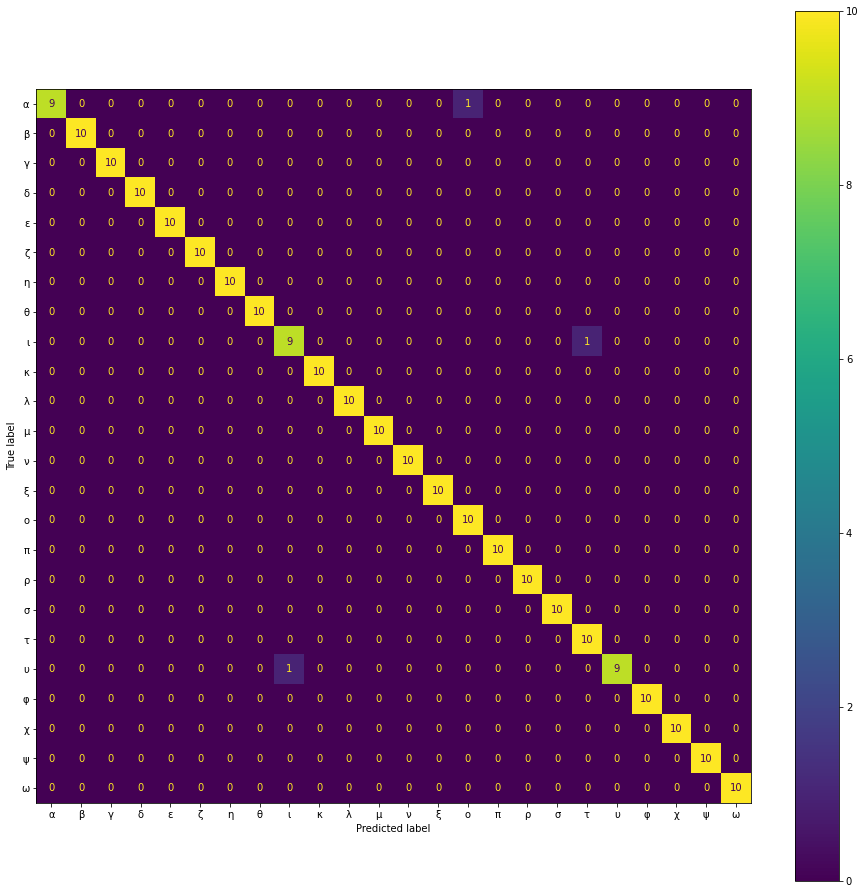

In [126]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 16))
plot_confusion_matrix(svm_clf, test_data, test_labels, ax=ax)

In [127]:
print("KNN accuracy Score with test data: ")
scores = metrics.accuracy_score(test_labels, test_predict_knn, normalize=True)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

KNN accuracy Score with test data: 
Accuracy: 0.97 (+/- 0.00)


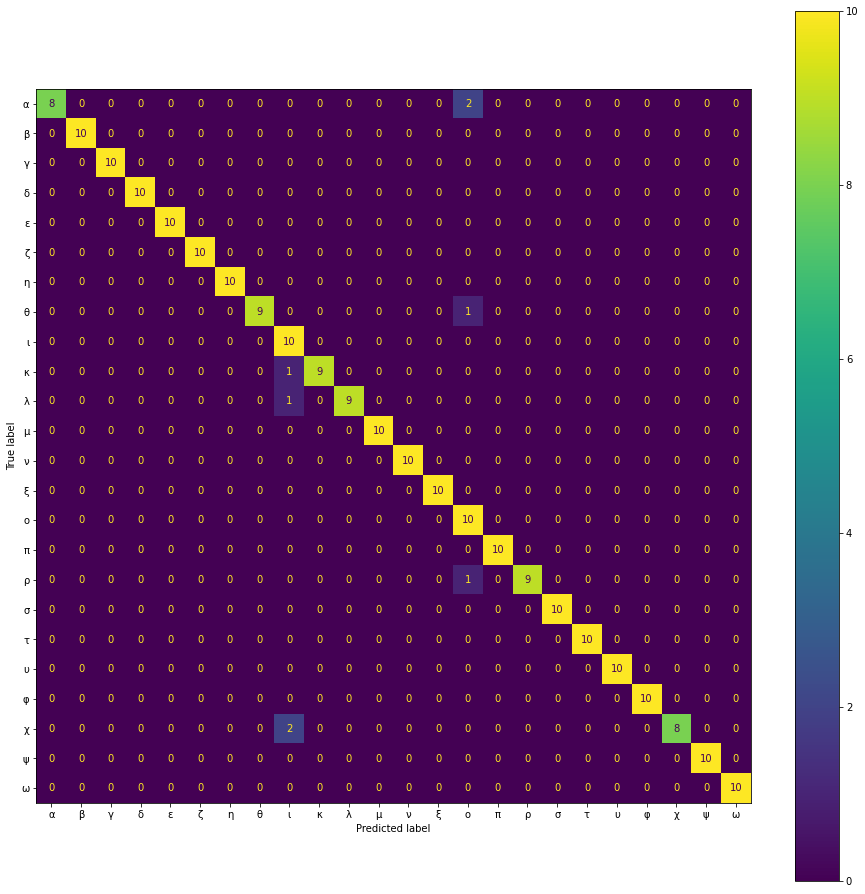

In [128]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 16))
plot_confusion_matrix(knn_clf, test_data, test_labels, ax=ax)

In [129]:
#have each letter classifed and its classification added to a list then printed out, then have this list split appart for each word.
# Extract letters from page
start_time = time.time()
extract = Extract_Letters()

letters_in_doc_svm = []
letters_in_doc_knn = []

letters = extract.extractFile("/content/WritingRecognition/Greek_data_test/greek letters test 1-1.png", "defualt")#add default mode

for i in letters:#for each letter in the file    
  hog_features = hog(i, orientations=12, pixels_per_cell=(2, 2), cells_per_block=(1, 1))
  result_type_svm = svm_clf.predict(hog_features.reshape(1,-1))
  result_type_knn = knn_clf.predict(hog_features.reshape(1,-1))
  letters_in_doc_svm.append(result_type_svm)
  letters_in_doc_knn.append(result_type_knn)
  
doc_svm = ""
doc_knn = ""
print (time.time() - start_time, "seconds" )
for ele in letters_in_doc_svm:#num should be the same
  doc_svm+=(ele[0])#gets just the predicted character and adds to the string
for ele in letters_in_doc_knn:
  doc_knn+=(ele[0])

print("svm page interpretation: ")
print(doc_svm)
print("knn page interpretation: ")
print(doc_knn)

Extracting characters...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2


/content/WritingRecognition/Greek_data_test/greek letters test 1-1.png
15.837860107421875 seconds
svm page interpretation: 
αβγδεζηθικλμνξοπρστυφχψωαβγδεζηθικλμνξοπρστυφχψωαβγδεζηθικλμνξοπρστυφχψωαβγδεζηθικλμνξοπρστυφχψωαβγδεζηθικλμνξοπρστυφχψωαβγδεζηθικλμνξοπρστυφχψω
knn page interpretation: 
αβγδεζηθικλμνξοπρστυφχψωαβγδεζηθικλμνξοπρστυφχψωαβγδεζηθιιλμνξοπρστυφχψωαβγδεζηθικλμνξοπρστυφχψωαβγδεζηθικλμνξοπρστυφχψωαβγδεζηθικλμνξοπρστυφχψω


# Helper methods

Shows the detected boxes on a given page for data varification

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2


378


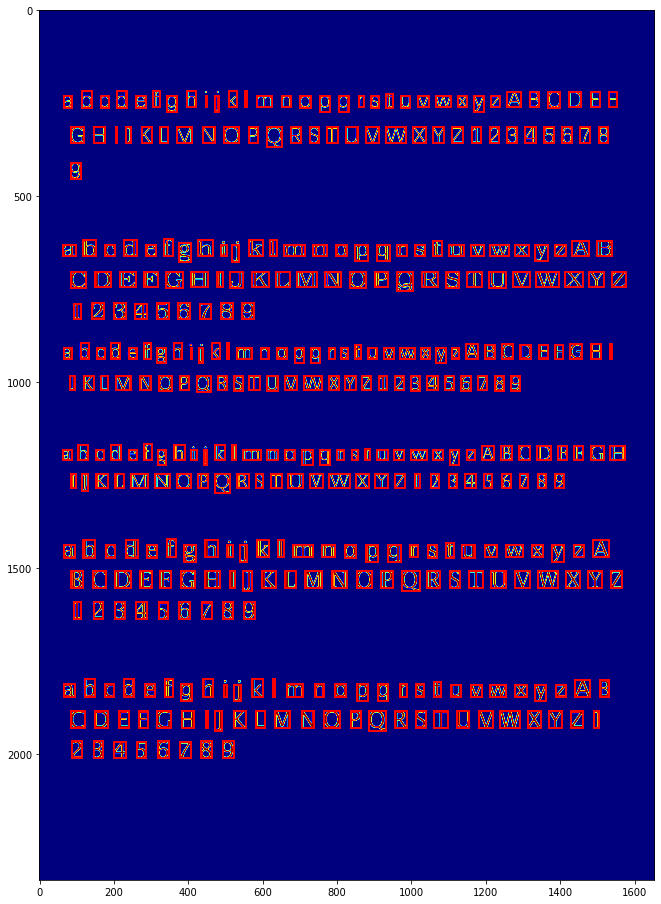

366
0
True


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.misc import imread,imresize
from skimage.segmentation import clear_border
from skimage.morphology import label
from skimage.measure import regionprops

image = imread("/content/WritingRecognition/NEW_DATA_english/testing/test3-1.png",1)

#apply threshold in order to make the image binary
bw = image < 120

# remove artifacts connected to image border
cleared = bw.copy()
clear_border(cleared)

# label image regions
label_image = label(cleared,neighbors=8)
borders = np.logical_xor(bw, cleared)
label_image[borders] = -1

print (label_image.max())

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 16))
ax.imshow(bw, cmap='jet')

total = 0
for region in regionprops(label_image):
    # skip small images
    minr, minc, maxr, maxc = region.bbox
    #if region.area > 50:
    if maxr - minr > len(bw) / 250:#new CONDITION
        # draw rectangle around segmented coins
        
        #print(type(maxr))
        #add 1/4th the height to the height to include dots on letters
        #minr-=(maxr - minr)*0.40
        rect = mpatches.Rectangle((minc, minr), (maxc - minc), (maxr - minr), fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        total+=1

plt.show()
print(total)
print(total % 61)
print(total % 61 == 0)

Removes snippets from the training_type folder sub dir's

In [ ]:
import os
base_dir = "/content/WritingRecognition/greek_test_snippets/"#set to the folder with character sub folders.
#folder paths:
#"/content/WritingRecognition/training_snippets_english/"
#"/content/WritingRecognition/test_snippets_english/"

#"/content/WritingRecognition/greek_train_snippets/"
#"/content/WritingRecognition/greek_test_snippets/"
dir_names = next(os.walk(base_dir))[1]
print(dir_names)
for dir_name in dir_names:
  print("Removing files in: "+dir_name)
  filelist = [ f for f in os.listdir(base_dir+dir_name) if f.endswith(".png") ]
  for f in filelist:
    print("Removed: "+f)
    os.remove(os.path.join(base_dir,dir_name, f))

showing an image

In [ ]:
rgb = imread('/content/drive/My Drive/Colab Notebooks/WritingRecognition/training_type/1/600.png')
plt.imshow(rgb,cmap=cm.Greys_r,aspect='equal')
plt.show()

In [ ]:
#data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=0, test_size=0.20)

# Neural network (English)

In [87]:
%tensorflow_version 1.x
import tensorflow as tf

import cv2
import glob
import numpy as np
import os

english_training_snippet_dir = "/content/WritingRecognition/training_snippets_english/"
english_testing_snippet_dir = "/content/WritingRecognition/test_snippets_english/"

X_train = []
y_train = []

X_test = []
y_test = []

#new general method to do this:
#given the parent dir, will create append to an empty dataset array and subsiquent labels array (with each sub dir being a label)
def create_dataset_and_labels_from_parent_dir(base_dir, test_data, test_labels):
  dir_names = next(os.walk(base_dir))[1]
  print("Subdirectories are:")
  print(dir_names)

  def file_names(path):#returns a list of the file names in the directory
    return sorted([filename for filename in os.listdir(path) if filename.endswith('.png')])

  def append_img_data_and_labels(filenames, label):#given a list of file names load the img into array and appned the label of them to the labels array
    for filename in filenames:#for each filename
      image = cv2.imread(filename)#load the img
      #or do hog features etc.
      image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)#convert to single channel- from 3 channel to match mnist
      test_data.append(image)
      test_labels.append(label)
    print('Finished adding %s samples to dataset'%(label))

  for dir_name in dir_names:#for each directory in the sub dir list
    FILENAMES = file_names(base_dir + dir_name)#get file name list for that directory
    FILENAMES = [base_dir + dir_name + "/" + filename for filename in FILENAMES]#add the full path to all the filenames
    append_img_data_and_labels(FILENAMES, dir_name)#use the append method to add to dataset + labels

#-----------------------------------------------------------------------------------------------------------------------------

create_dataset_and_labels_from_parent_dir(english_training_snippet_dir, X_train, y_train)
print('X_train shape:', np.array(X_train).shape)

create_dataset_and_labels_from_parent_dir(english_testing_snippet_dir, X_test, y_test)
print('X_test shape:', np.array(X_test).shape)

#convert to numpy array
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)

Subdirectories are:
['h', '9', '1', '2', 'v', 'q', 'k', '4', '6', 'r', 'j', 's', 'g', 'f', 'a', 'l', 'y', 'z', '7', 'n', 'b', 'w', '8', 'x', 'i', 'd', '3', 'p', 'e', 'u', 'o', 't', 'm', '5', 'c']
Finished adding h samples to dataset
Finished adding 9 samples to dataset
Finished adding 1 samples to dataset
Finished adding 2 samples to dataset
Finished adding v samples to dataset
Finished adding q samples to dataset
Finished adding k samples to dataset
Finished adding 4 samples to dataset
Finished adding 6 samples to dataset
Finished adding r samples to dataset
Finished adding j samples to dataset
Finished adding s samples to dataset
Finished adding g samples to dataset
Finished adding f samples to dataset
Finished adding a samples to dataset
Finished adding l samples to dataset
Finished adding y samples to dataset
Finished adding z samples to dataset
Finished adding 7 samples to dataset
Finished adding n samples to dataset
Finished adding b samples to dataset
Finished adding w samples t

In [88]:
#creates a label tuple list and defines a method to find the int label for a string label
label_tuples = []

value = 0
for dir in next(os.walk("/content/WritingRecognition/training_snippets_english/"))[1]:
  label_tuples.append((dir, value))
  value+=1

#finds the int tuple pair of the string label
def find_label_value(string_label, label_tuples):
  for ele in label_tuples:
    if(ele[0]== string_label):
      return ele[1]

def find_label_string(int_label, label_tuples):
  for ele in label_tuples:
    if(ele[1]== int_label):
      return ele[0]

# print(find_label_value("g",label_tuples))
#print(find_label_string(0,label_tuples))
y_train = [find_label_value(label,label_tuples) for label in y_train]

y_test = [find_label_value(label,label_tuples) for label in y_test]

Define network:

In [89]:
%tensorflow_version 1.x
import tensorflow as tf
tf.__version__

n_epochs = 80
batch_size = 100

n_inputs = 20*20 
n_hidden1 = 300
n_hidden2 = 100
n_outputs = len(label_tuples)#the number of classes

X_train = X_train.astype(np.float32).reshape(-1, 20*20) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 20*20) / 255.0

y_train = np.array(y_train , dtype=np.int32)#into numpy arrays
y_test = np.array(y_test,  dtype=np.int32)

#------------------------------- shuffle data and labels before split

indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)

X_train = X_train[indices]
y_train = y_train[indices]

#-------------------------------

X_valid, X_train = X_train[:500], X_train[500:]#take some validation data
y_valid, y_train = y_train[:500], y_train[500:]

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()


Train:

In [90]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch
        
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./english_model.ckpt")

0 Batch accuracy: 0.22 Validation accuracy: 0.182
1 Batch accuracy: 0.44 Validation accuracy: 0.412
2 Batch accuracy: 0.55 Validation accuracy: 0.538
3 Batch accuracy: 0.69 Validation accuracy: 0.648
4 Batch accuracy: 0.77 Validation accuracy: 0.724
5 Batch accuracy: 0.75 Validation accuracy: 0.766
6 Batch accuracy: 0.74 Validation accuracy: 0.794
7 Batch accuracy: 0.86 Validation accuracy: 0.818
8 Batch accuracy: 0.92 Validation accuracy: 0.844
9 Batch accuracy: 0.84 Validation accuracy: 0.852
10 Batch accuracy: 0.9 Validation accuracy: 0.87
11 Batch accuracy: 0.89 Validation accuracy: 0.882
12 Batch accuracy: 0.95 Validation accuracy: 0.88
13 Batch accuracy: 0.94 Validation accuracy: 0.894
14 Batch accuracy: 0.95 Validation accuracy: 0.898
15 Batch accuracy: 0.92 Validation accuracy: 0.894
16 Batch accuracy: 0.88 Validation accuracy: 0.906
17 Batch accuracy: 0.89 Validation accuracy: 0.906
18 Batch accuracy: 0.94 Validation accuracy: 0.914
19 Batch accuracy: 0.92 Validation accuracy:

In [91]:
with tf.Session() as sess:
    saver.restore(sess, "./english_model.ckpt") # or better, use save_path
    #------------shuffle before split - to get a better look at the results
    indices = np.arange(X_test.shape[0])
    np.random.shuffle(indices)

    X_test = X_test[indices]
    y_test = y_test[indices]
    #---------------------------------
    X_new_scaled = X_test
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)
    
print("Predicted classes:", y_pred[:20])
print("Actual classes:   ", y_test[:20])

from sklearn import metrics
print("Neural net accuracy Score with test data (english): ")
scores = metrics.accuracy_score(y_test, y_pred, normalize=True)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

INFO:tensorflow:Restoring parameters from ./english_model.ckpt
Predicted classes: [ 5 18  2 28  9 28 30 29 25 34  5 28  0  5 11 18 26 11  5  0]
Actual classes:    [ 5 18 15 28  9 28 30 29 25 34  5 28  0  5 11 18 26 11  5  0]
Neural net accuracy Score with test data (english): 
Accuracy: 0.97 (+/- 0.00)


INFO:tensorflow:Restoring parameters from ./english_model.ckpt
[[42  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 42  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 42  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

Text(0.5, 123.0, 'Predicted label')

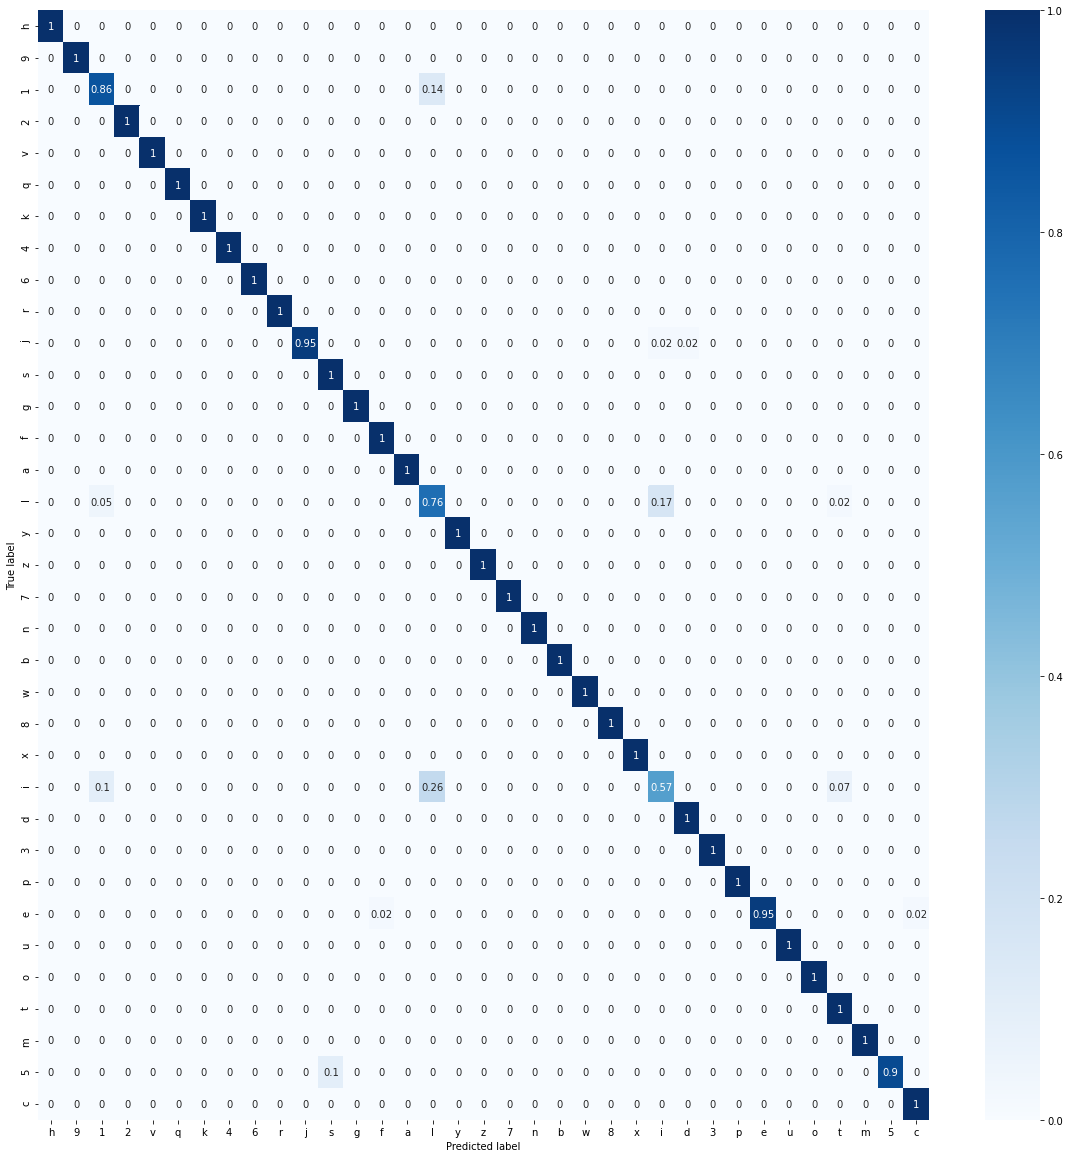

In [92]:
import sys
import numpy
#for the numpy array output version
numpy.set_printoptions(threshold=sys.maxsize)#to display all rows
numpy.set_printoptions(linewidth =sys.maxsize)#makes it so it the rows dont wrap around

with tf.Session() as sess:
    saver.restore(sess, "./english_model.ckpt")
    confusion = tf.confusion_matrix(labels=y_test, predictions=y_pred, num_classes=len(label_tuples))#for its own data (split from the training dataset)
    numpy_con_mat = confusion.eval(session=sess)
    print(numpy_con_mat)
    
#numpy_con_mat = numpy_con_mat[:36,:36]
con_mat_norm = np.around(numpy_con_mat.astype('float') / numpy_con_mat.sum(axis=1)[:, np.newaxis], decimals=2)#get relative frequency for prediction labels

#new tick lables
labels_ordered = [ele[0] for ele in label_tuples] #will be in order deteremined by the os walk order.
print(labels_ordered)
labels_correct = labels_ordered#['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '1', '2', '3', '4', '5', '6', '7', '8', '9']
import pandas as pd
con_mat_df = pd.DataFrame(con_mat_norm, index = labels_correct, columns = labels_correct)

from matplotlib import pyplot as plt
import seaborn as sns

figure = plt.figure(figsize=(16, 16))

sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')


New document letter recognition with neural net:

In [ ]:
#have each letter classifed and its classification added to a list then printed out, then have this list split appart for each word.
# Extract letters from page
import cv2
import time
start_time = time.time()
extract = Extract_Letters()

letters_in_doc_svm = []

letters = extract.extractFile("/content/WritingRecognition/old_data_english/testing/shazam.png", "defualt")#add default mode

for letter in letters:#for each letter in the file
  letters_in_doc_svm.append(letter)#image)
  
letters_in_doc_svm= np.array(letters_in_doc_svm , dtype=np.float32)#converts to numpy array
print(letters_in_doc_svm.shape)#(1303, 20, 20)

#-----------------------------------show an image
# from PIL import Image
# import numpy as np
# from matplotlib import pyplot as plt
# plt.imshow(letters_in_doc_svm[0], interpolation='nearest')
# plt.show()
#-----------------------------------

letters_in_doc_svm = letters_in_doc_svm.astype(np.float32).reshape(-1, 20*20) #/ 255.0 #no idea why this fixes it! (the data should be exactly the same)
print(letters_in_doc_svm.shape)#(1303, 400)

In [ ]:
#to classfy an array of images
with tf.Session() as sess:
    saver.restore(sess, "./english_model.ckpt") # or better, use save_path
    X_new_scaled =  letters_in_doc_svm#feed img array
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

print("Predicted classes:", y_pred)

In [95]:
doc_NN = ""
#print (time.time() - start_time, "seconds" )
for ele in y_pred:#num should be the same
  doc_NN+=(find_label_string(ele, label_tuples))#gets just the predicted character and adds to the string

print("Neural net page interpretation for english: ")
print(doc_NN)

Neural net page interpretation for english: 
nvldidsgrdphlcschlpsdrentusedjustforgdmesdnymoreslncethecompdnymddeitschipsprogrdmmdbietheydretdklngonfunctlonsthdtinteimicroprocessorsdoandmorethdnevertheydrebeingusedforblgddtdnumbercrunchingdndsolvlngproblemsthdtpreviousiyhddtobedonebynongrdphlcssupercomputersjenhsunhudngkplcturedjchiefexecutlveofnvldldsdldlndkeynotespeechdtthecompdnysgputechconferencethdttopenterprisedndmobiledppcompdnlesdreusinggpuscgrdphlcsprocessingunltsjtohdndlebigddtddndlyticsddvdncesedrchdndtdsksllkefdcerecognitlonthesedppiicdtionsdrespredddcrossthecommercldldndconsumerspdcescustomerswhodreusingnvidldgpuslnserversmddebycomputermdkersinciudeshdzdmsdiesforcecomdndcortexicdtheydreuslngnvldidtesidgpusforcomputingtdsksbeyondtrdditlondigrdphlcsprocessingtheproblemsdthdndinciudedudiosedrchsuchdsshdzdmsservicethdttelisyouwhdtsongyoureiisteningtoontherddlogpusendbleustohdndieourtremendousprocessingneedsdtdsubstdntidicostsdvingsdellverlngtwlcetheperformdnceperdolldrcompdredt

# Neural network (greek)

In [96]:
%tensorflow_version 1.x
import tensorflow as tf

import cv2
import glob
import numpy as np
import os

english_training_snippet_dir = "/content/WritingRecognition/greek_train_snippets/"
english_testing_snippet_dir = "/content/WritingRecognition/greek_test_snippets/"

X_train = []
y_train = []

X_test = []
y_test = []

#given the parent dir, will create append to an empty dataset array and subsiquent labels array (with each sub dir being a label)
def create_dataset_and_labels_from_parent_dir(base_dir, test_data, test_labels):
  dir_names = next(os.walk(base_dir))[1]
  print("Subdirectories are:")
  print(dir_names)

  def file_names(path):#returns a list of the file names in the directory
    return sorted([filename for filename in os.listdir(path) if filename.endswith('.png')])

  def append_img_data_and_labels(filenames, label):#given a list of file names load the img into array and appned the label of them to the labels array
    for filename in filenames:#for each filename
      image = cv2.imread(filename)#load the img
      #or do hog features etc.
      image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)#convert to single channel- from 3 channel to match mnist
      test_data.append(image)
      test_labels.append(label)
    print('Finished adding %s samples to dataset'%(label))

  for dir_name in dir_names:#for each directory in the sub dir list
    FILENAMES = file_names(base_dir + dir_name)#get file name list for that directory
    FILENAMES = [base_dir + dir_name + "/" + filename for filename in FILENAMES]#add the full path to all the filenames
    append_img_data_and_labels(FILENAMES, dir_name)#use the append method to add to dataset + labels

#-----------------------------------------------------------------------------------------------------------------------------

create_dataset_and_labels_from_parent_dir(english_training_snippet_dir, X_train, y_train)
print('X_train shape:', np.array(X_train).shape)

create_dataset_and_labels_from_parent_dir(english_testing_snippet_dir, X_test, y_test)
print('X_test shape:', np.array(X_test).shape)

#convert to numpy array
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)

Subdirectories are:
['δ', 'ζ', 'σ', 'ε', 'λ', 'χ', 'θ', 'κ', 'ξ', 'ν', 'γ', 'ι', 'α', 'τ', 'ω', 'β', 'ο', 'ψ', 'π', 'φ', 'ρ', 'μ', 'υ', 'η']
Finished adding δ samples to dataset
Finished adding ζ samples to dataset
Finished adding σ samples to dataset
Finished adding ε samples to dataset
Finished adding λ samples to dataset
Finished adding χ samples to dataset
Finished adding θ samples to dataset
Finished adding κ samples to dataset
Finished adding ξ samples to dataset
Finished adding ν samples to dataset
Finished adding γ samples to dataset
Finished adding ι samples to dataset
Finished adding α samples to dataset
Finished adding τ samples to dataset
Finished adding ω samples to dataset
Finished adding β samples to dataset
Finished adding ο samples to dataset
Finished adding ψ samples to dataset
Finished adding π samples to dataset
Finished adding φ samples to dataset
Finished adding ρ samples to dataset
Finished adding μ samples to dataset
Finished adding υ samples to dataset
Finished

In [97]:
#creates a label tuple list and defines a method to find the int label for a string label
label_tuples = []

value = 0
for dir in next(os.walk("/content/WritingRecognition/greek_train_snippets"))[1]:
  label_tuples.append((dir, value))
  value+=1

#finds the int tuple pair of the string label
def find_label_value(string_label, label_tuples):
  for ele in label_tuples:
    if(ele[0]== string_label):
      return ele[1]

def find_label_string(int_label, label_tuples):
  for ele in label_tuples:
    if(ele[1]== int_label):
      return ele[0]

y_train = [find_label_value(label,label_tuples) for label in y_train]

y_test = [find_label_value(label,label_tuples) for label in y_test]

Define network:

In [98]:
%tensorflow_version 1.x
import tensorflow as tf
tf.__version__

n_inputs = 20*20 
n_hidden1 = 300
n_hidden2 = 100
n_outputs = len(label_tuples)#the number of classes

X_train = X_train.astype(np.float32).reshape(-1, 20*20) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 20*20) / 255.0

y_train = np.array(y_train , dtype=np.int32)#into numpy arrays
y_test = np.array(y_test,  dtype=np.int32)

#------------------------------- shuffle data and labels before split

indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)

X_train = X_train[indices]
y_train = y_train[indices]

#-------------------------------

X_valid, X_train = X_train[:15], X_train[15:]#take some validation data
y_valid, y_train = y_train[:15], y_train[15:]

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_epochs = 80
batch_size = 100

Train:

In [99]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch
        
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./greek_model.ckpt")

0 Batch accuracy: 0.022900764 Validation accuracy: 0.0
1 Batch accuracy: 0.03816794 Validation accuracy: 0.0
2 Batch accuracy: 0.06870229 Validation accuracy: 0.0
3 Batch accuracy: 0.06870229 Validation accuracy: 0.0
4 Batch accuracy: 0.129771 Validation accuracy: 0.0
5 Batch accuracy: 0.14503817 Validation accuracy: 0.0
6 Batch accuracy: 0.17557251 Validation accuracy: 0.06666667
7 Batch accuracy: 0.17557251 Validation accuracy: 0.06666667
8 Batch accuracy: 0.22137405 Validation accuracy: 0.13333334
9 Batch accuracy: 0.27480915 Validation accuracy: 0.13333334
10 Batch accuracy: 0.29007635 Validation accuracy: 0.13333334
11 Batch accuracy: 0.2977099 Validation accuracy: 0.2
12 Batch accuracy: 0.2977099 Validation accuracy: 0.2
13 Batch accuracy: 0.34351146 Validation accuracy: 0.2
14 Batch accuracy: 0.36641222 Validation accuracy: 0.2
15 Batch accuracy: 0.38931298 Validation accuracy: 0.2
16 Batch accuracy: 0.41984734 Validation accuracy: 0.2
17 Batch accuracy: 0.48854962 Validation ac

In [100]:
with tf.Session() as sess:
    saver.restore(sess, "./greek_model.ckpt") # or better, use save_path
    #------------shuffle before split - to get a better look at the results
    indices = np.arange(X_test.shape[0])
    np.random.shuffle(indices)

    X_test = X_test[indices]
    y_test = y_test[indices]
    #---------------------------------
    X_new_scaled = X_test
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)
    
print("Predicted classes:", y_pred[:20])
print("Actual classes:   ", y_test[:20])

from sklearn import metrics
print("Neural net accuracy Score with test data (greek): ")
scores = metrics.accuracy_score(y_test, y_pred, normalize=True)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

INFO:tensorflow:Restoring parameters from ./greek_model.ckpt
Predicted classes: [ 4  1  4  8 20  7  5  6 11 11 21  7  7  8 22 14 22  0  1 15]
Actual classes:    [ 4  1  4  8 20  7  5  6 11 11 21  7  7  8 22 14 22  0  1 15]
Neural net accuracy Score with test data (greek): 
Accuracy: 0.96 (+/- 0.00)


INFO:tensorflow:Restoring parameters from ./greek_model.ckpt
[[10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  8  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  

Text(0.5, 123.0, 'Predicted label')

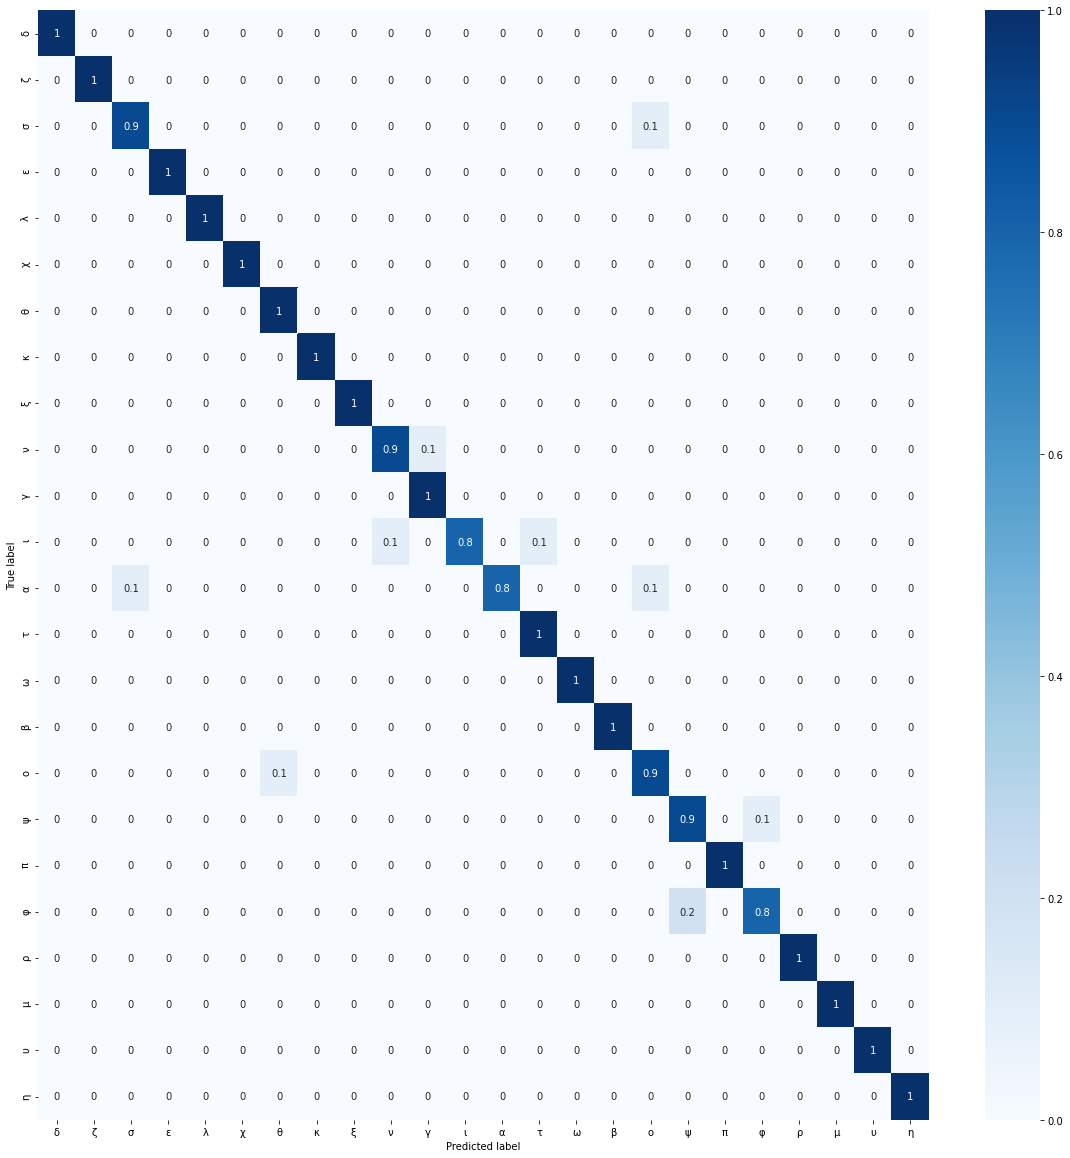

In [101]:
import sys
import numpy
#for the numpy array output version
numpy.set_printoptions(threshold=sys.maxsize)#to display all rows
numpy.set_printoptions(linewidth =sys.maxsize)#makes it so it the rows dont wrap around

with tf.Session() as sess:
    saver.restore(sess, "./greek_model.ckpt")
    confusion = tf.confusion_matrix(labels=y_test, predictions=y_pred, num_classes=len(label_tuples))#for its own data (split from the training dataset)
    numpy_con_mat = confusion.eval(session=sess)
    print(numpy_con_mat)
    
#numpy_con_mat = numpy_con_mat[:36,:36]
con_mat_norm = np.around(numpy_con_mat.astype('float') / numpy_con_mat.sum(axis=1)[:, np.newaxis], decimals=2)#get relative frequency for prediction labels

#new tick lables
labels_correct = [ele[0] for ele in label_tuples]
import pandas as pd
con_mat_df = pd.DataFrame(con_mat_norm, index = labels_correct, columns = labels_correct)

from matplotlib import pyplot as plt
import seaborn as sns

figure = plt.figure(figsize=(16, 16))

sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')


New document letter recognition with neural net:

In [ ]:
#have each letter classifed and its classification added to a list then printed out, then have this list split appart for each word.
# Extract letters from page
import cv2
import time
start_time = time.time()
extract = Extract_Letters()

letters_in_doc_svm = []

letters = extract.extractFile("/content/WritingRecognition/Greek_data_test/greek letters test 1-1.png", "defualt")#add default mode

for letter in letters:#for each letter in the file
  letters_in_doc_svm.append(letter)#image)
  
letters_in_doc_svm= np.array(letters_in_doc_svm , dtype=np.float32)#converts to numpy array
print(letters_in_doc_svm.shape)#(1303, 20, 20)

#-----------------------------------show an image
# from PIL import Image
# import numpy as np
# from matplotlib import pyplot as plt
# plt.imshow(letters_in_doc_svm[0], interpolation='nearest')
# plt.show()
#-----------------------------------

letters_in_doc_svm = letters_in_doc_svm.astype(np.float32).reshape(-1, 20*20) #/ 255.0 #no idea why this fixes it! (the data should be exactly the same)
print(letters_in_doc_svm.shape)#(1303, 400)

In [103]:
#to classfy an array of images
with tf.Session() as sess:
    saver.restore(sess, "./greek_model.ckpt") # or better, use save_path
    X_new_scaled =  letters_in_doc_svm#feed img array
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

print("Predicted classes:", y_pred)

INFO:tensorflow:Restoring parameters from ./greek_model.ckpt
Predicted classes: [12 15 10  0  3  1 23  6 11  7  4 21  9  8 16 18 20  2 13 22 19  5 17 14 12 15 10  0  3  1 23  6 11  7  4 21  9  8 16 18 20  2 13 22 19  5 17 14 12 15 10  0  3  1 23  6 11  7  4 21  9  8 16 18 20  2 13 22 19  5 17 14 12 15 10  0  3  1 23  6 11  7  4 21  9  8 16 18 20  2 13 22 19  5 17 14 12 15 10  0  3  1 23  6 11  7  4 21  9  8 16 18 20  2 13 22 19  5 19 14 12 15 10  0  3  1 23  6 11  7  4 21  9  8  6 18 20  2 13 22 19  5 17 14]


In [104]:
doc_NN = ""
#print (time.time() - start_time, "seconds" )
total = 0
for ele in y_pred:#num should be the same
  if(total % 24 == 0):#splits the known print data for nicer output
    doc_NN+= "\n"
  doc_NN+=(find_label_string(ele, label_tuples))#gets just the predicted character and adds to the string
  total +=1

print("Neural net page interpretation for greek: ")
print(doc_NN)

Neural net page interpretation for greek: 

αβγδεζηθικλμνξοπρστυφχψω
αβγδεζηθικλμνξοπρστυφχψω
αβγδεζηθικλμνξοπρστυφχψω
αβγδεζηθικλμνξοπρστυφχψω
αβγδεζηθικλμνξοπρστυφχφω
αβγδεζηθικλμνξθπρστυφχψω
